In [1]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the data
# use forward slashes to avoid Python treating backslashes as escape sequences
totalWind = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaTotalWind.csv")

C:\Users\stian\AppData\Local\Temp\ipykernel_27592\1209043798.py:3: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  totalWind = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaTotalWind.csv")


In [3]:
#cleaning the columns
totalWind.drop([0,1,2], inplace = True)
totalWind.columns = ['time', 'national', 'DK01', 'DK02', 'DK03', 'DK04', 'DK05']
#we want time as datetime object 
totalWind['time'] = pd.to_datetime(totalWind['time'])
totalWind['national'] = pd.to_numeric(totalWind['national'])

In [4]:
totalWind

,time,national,DK01,DK02,DK03,DK04,DK05
3,1980-01-01 00:00:00+00:00,0.122876,0.173497,0.226407,0.045095,0.103339,0.120442
4,1980-01-01 01:00:00+00:00,0.119717,0.164914,0.224374,0.04903,0.097163,0.112279
5,1980-01-01 02:00:00+00:00,0.117189,0.154415,0.220325,0.058575,0.090558,0.103703
6,1980-01-01 03:00:00+00:00,0.113040,0.143466,0.216748,0.069945,0.078771,0.092318
7,1980-01-01 04:00:00+00:00,0.106618,0.131167,0.214374,0.077951,0.062065,0.080078
...,...,...,...,...,...,...,...
394486,2024-12-31 19:00:00+00:00,0.886081,0.745368,0.858423,0.916075,0.901096,0.870305
394487,2024-12-31 20:00:00+00:00,0.892645,0.771123,0.882582,0.924209,0.899937,0.863677
394488,2024-12-31 21:00:00+00:00,0.896686,0.81028,0.901164,0.928739,0.897901,0.855458
394489,2024-12-31 22:00:00+00:00,0.901577,0.838301,0.912978,0.933,0.900396,0.854166


Mean capacity factor 1980-2024: 0.30620624681866115
Min Capacity factor: 0.000109, max capacity factor 0.970996


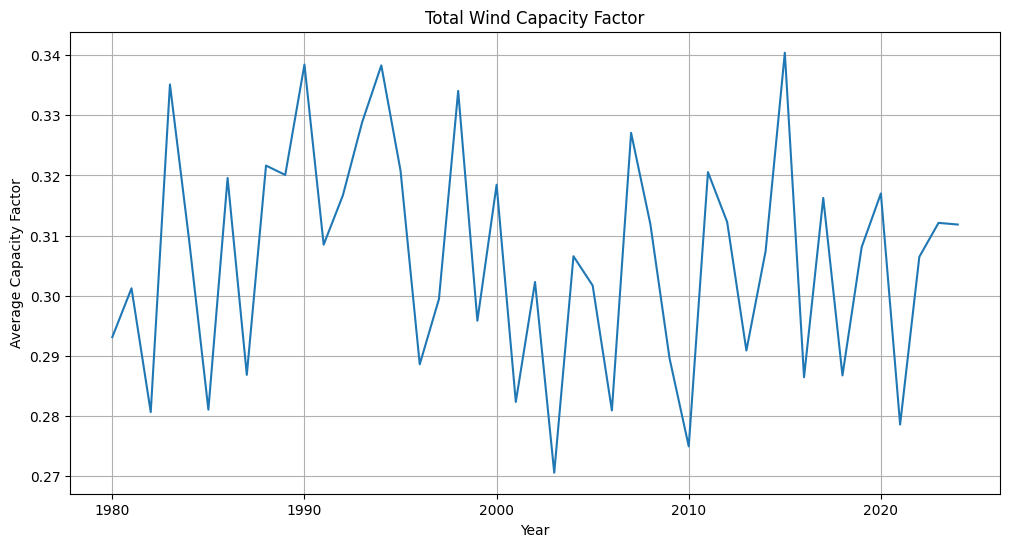

In [21]:
meanCapFac = totalWind['national'].mean()
maxCapFac = totalWind['national'].max()
minCapFac = totalWind['national'].min()

print(f'Mean capacity factor 1980-2024: {meanCapFac}')
print(f'Min Capacity factor: {minCapFac}, max capacity factor {maxCapFac}')
#df.groupby(df.your_date_column.dt.month)['values_column'].sum()
year_avg_wind = totalWind.groupby(totalWind.time.dt.year)['national'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(year_avg_wind['time'], year_avg_wind['national'])
plt.grid()
plt.xlabel('Year')
plt.title('Total Wind Capacity Factor')
plt.ylabel('Average Capacity Factor')
plt.show()

In [22]:
highs = year_avg_wind.sort_values('national', ascending=False).head(5)
lows = year_avg_wind.sort_values('national', ascending=True).head(5)

print('Years with high capacity factor\n\n', highs,'\n\n')
print('Years with low Capacity factors\n\n', lows)

Years with high capacity factor

     time  national
35  2015  0.340395
10  1990  0.338431
14  1994  0.338293
3   1983  0.335126
18  1998  0.334047 


Years with low Capacity factors

     time  national
23  2003  0.270565
30  2010  0.274948
41  2021  0.278576
2   1982  0.280650
26  2006  0.280924


The above plot shows average capacity factor per year. The goal is to find years of high production and years of low production to obtain different scenarios we can use as data source.

It seems 2015, 1990 and 1994 are the peak years when wind is concerned.

2003, 2010 and 2021 are the lowest years.

# PV

In [17]:
pv = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaPV.csv")
pv

C:\Users\stian\AppData\Local\Temp\ipykernel_27592\154343626.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pv = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/Data/ninjaPV.csv")


,"# Renewables.ninja pv (country zones, hourly, 1980 - 2024) - DK - ninja-pv-countryzones-DK-hourly-merra2.csv.gz - Version: 1.4 - License: https://creativecommons.org/licenses/by-nc/4.0/ - Reference: https://doi.org/10.1016/j.energy.2016.08.060",Unnamed: 1
0,"# Units: time in UTC, other columns are bias-c...",NaN
1,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN
2,time,NATIONAL
3,1980-01-01 00:00:00+00:00,0.000000
4,1980-01-01 01:00:00+00:00,0.000000
...,...,...
394486,2024-12-31 19:00:00+00:00,0.0
394487,2024-12-31 20:00:00+00:00,0.0
394488,2024-12-31 21:00:00+00:00,0.0
394489,2024-12-31 22:00:00+00:00,0.0


In [18]:
#cleaning the columns
pv.drop([0,1,2], inplace = True)
pv.columns = ['time', 'national']
#we want time as datetime object 
pv['time'] = pd.to_datetime(pv['time'])
pv['national'] = pd.to_numeric(pv['national'])

Mean capacity factor 1980-2024: 0.11332277027438098
Min Capacity factor: 0.0, max capacity factor 0.735


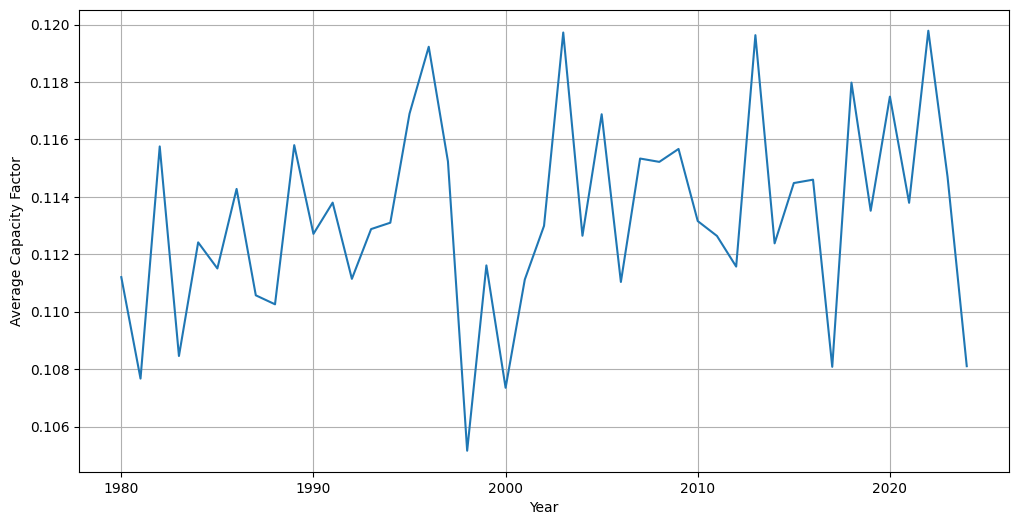

In [23]:
meanCapFac = pv['national'].mean()
maxCapFac = pv['national'].max()
minCapFac = pv['national'].min()

print(f'Mean capacity factor 1980-2024: {meanCapFac}')
print(f'Min Capacity factor: {minCapFac}, max capacity factor {maxCapFac}')
#df.groupby(df.your_date_column.dt.month)['values_column'].sum()
year_avg_pv = pv.groupby(pv.time.dt.year)['national'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(year_avg_pv['time'], year_avg_pv['national'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Capacity Factor')
plt.show()

In [24]:
highs = year_avg_pv.sort_values('national', ascending=False).head(5)
lows = year_avg_pv.sort_values('national', ascending=True).head(5)

print('Years with high capacity factor\n\n', highs,'\n\n')
print('Years with low Capacity factors\n\n', lows)

Years with high capacity factor

     time  national
42  2022  0.119788
23  2003  0.119725
33  2013  0.119633
16  1996  0.119229
38  2018  0.117980 


Years with low Capacity factors

     time  national
18  1998  0.105157
20  2000  0.107350
1   1981  0.107670
37  2017  0.108079
44  2024  0.108102


When it comes to PV, 2022, 2003 and 2013 are high years, whilst 1998, 2000 and 1981 are low years. 

Let's combine wind and solar to get total capacity: 

In [ ]:
df_merged = pd.merge(year_avg_wind, year_avg_pv, 'inner', on= 'time')
df_merged['total_cap_+'] = df_merged['national_x'] + df_merged['national_y']
df_merged['total_cap_*'] = df_merged['national_x'] * df_merged['national_y']

,time,national_x,national_y,total_cap_+,total_cap_*
0,1980,0.293107,0.111204,0.404311,0.032595
1,1981,0.301233,0.107670,0.408903,0.032434
2,1982,0.280650,0.115757,0.396406,0.032487
3,1983,0.335126,0.108457,0.443583,0.036347
4,1984,0.309193,0.112415,0.421607,0.034758


**Years with highest aggregated capacity factor**

In [33]:
df_merged.sort_values('total_cap_*', axis=0, ascending=False).head()

,time,national_x,national_y,total_cap_+,total_cap_*
35,2015,0.340395,0.114481,0.454876,0.038969
14,1994,0.338293,0.113099,0.451393,0.038261
10,1990,0.338431,0.112711,0.451141,0.038145
27,2007,0.327074,0.115335,0.442409,0.037723
15,1995,0.320800,0.116897,0.437698,0.037501


**Years with lowest capacity factors**

In [36]:
df_merged.sort_values('total_cap_*', axis=0, ascending=True).head()

,time,national_x,national_y,total_cap_+,total_cap_*
30,2010,0.274948,0.113156,0.388104,0.031112
26,2006,0.280924,0.111036,0.391960,0.031193
5,1985,0.281050,0.111506,0.392556,0.031339
21,2001,0.282340,0.111121,0.393461,0.031374
41,2021,0.278576,0.113793,0.392369,0.031700


Text(0.5, 0, 'year')

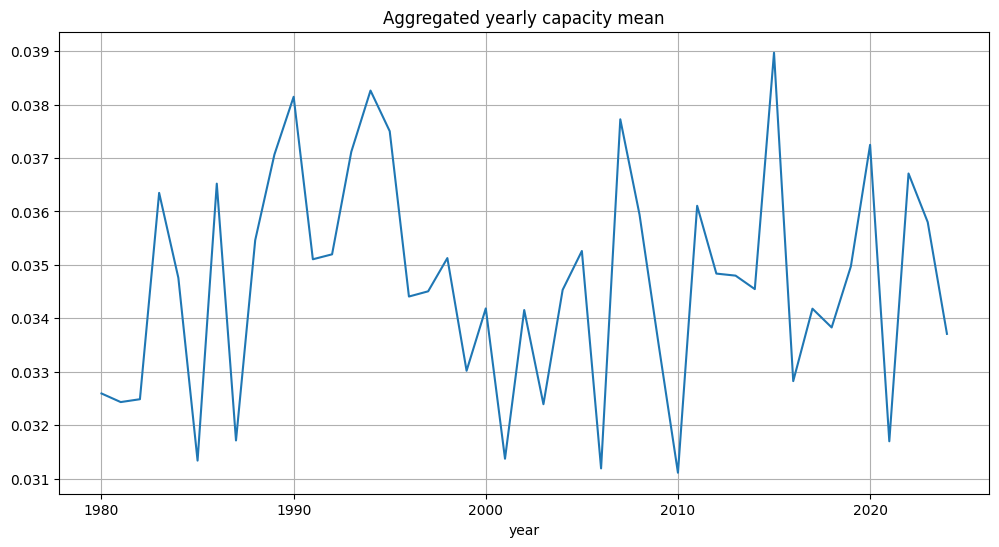

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df_merged['time'], df_merged['total_cap_*'])
plt.grid()
plt.title('Aggregated yearly capacity mean')
plt.xlabel('year')


Conclusions from EDA: 

1. If we want to look at a high-case scenario, the year ``2015`` can be a good candidate. 
2. if we need a low-case scenario, the year `2010` is a good candidate. 
3. We see that the yearly averages are more variable for the wind capacities, so this will heavily influence the aggregated result.
    * This makes sense and is 'fair' considering that wind currently is the main RES source in Denmark.